In [1]:
import pandas as pd
import numpy as np
from SALib.analyze import sobol
import matplotlib.pyplot as plt

In [2]:
# Carregar o arquivo CSV
file_path = '2024-08-29_18-30-43.728964_1M_result_30_50_hcl_emualtor.csv'  # Altere para o caminho correto do arquivo
df = pd.read_csv(file_path)

In [3]:
df.columns = ['u_u', 'theta_v', 'tau_v_plus', 'tau_w_plus', 'tau_fi', 'tau_so1', 'tau_so2', 'tau_si', 'minAPD', 'maxAPD', 'MAXmaxdVdt','MINmaxdVdt', 'maxDerivada', 'maxDerivada2']
# df.columns = ['u_u', 'theta_v', 'tau_v_plus', 'tau_w_plus', 'tau_fi', 'tau_so1', 'tau_so2', 'tau_si', 'minAPD', 'maxAPD', 'MAXmaxdVdt', 'MINmaxdVdt', 'meanDerivada']

# Obter o número de linhas de dados
num_rows = len(df)

D = 8 # número de variáveis amostradas


expected_size = 2 * D + 2
sample_size = (num_rows // expected_size) * expected_size

if sample_size % expected_size != 0:
    raise RuntimeError(f"Incorrect number of samples in model output file. Expected {expected_size} samples per parameter, but got {sample_size}. Check your sampling and simulation outputs.")

N = sample_size // expected_size

nomes_variaveis = ['u_u', 'theta_v', 'tau_v_plus', 'tau_w_plus', 'tau_fi', 'tau_so1', 'tau_so2', 'tau_si']

u_u = 1.58
theta_v = 0.3
tau_v_plus = 1.4506
tau_w_plus = 280.0
tau_fi = 0.11
tau_so1 = 43
tau_so2 = 0.2
tau_si = 2.8723

bounds = [[1.422, 1.738], [0.27, 0.33], [1.30554, 1.59566], [252., 308.], [0.099, 0.121], [38.7, 47.3], [0.18, 0.22]]


problem = {
    'num_vars': len(nomes_variaveis),
    'names': nomes_variaveis,
    'bounds': bounds
}

print(f"N (number of base samples) = {N}")

# Extrair as colunas desejadas
columns = ['minAPD', 'maxAPD', 'MAXmaxdVdt','MINmaxdVdt', 'maxDerivada', 'maxDerivada2']
data_columns = {col: df[col].head(sample_size).values for col in columns}

N (number of base samples) = 60000


# Sobol Unificado

In [4]:
import matplotlib.pyplot as plt
from SALib.analyze import sobol
import numpy as np
import seaborn as sns

variaveis = ['minAPD', 'maxAPD', 'MAXmaxdVdt','MINmaxdVdt', 'maxDerivada', 'maxDerivada2']
resultados = []  # Lista para armazenar os resultados de cada análise

# Loop para gerar as análises e armazenar os resultados
for variavel in variaveis:
    Y = data_columns[variavel]
    # Execute a análise de Sobol
    Si = sobol.analyze(problem, Y, calc_second_order=True, conf_level=0.95)
    resultados.append(Si)



/home/banhato/.local/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


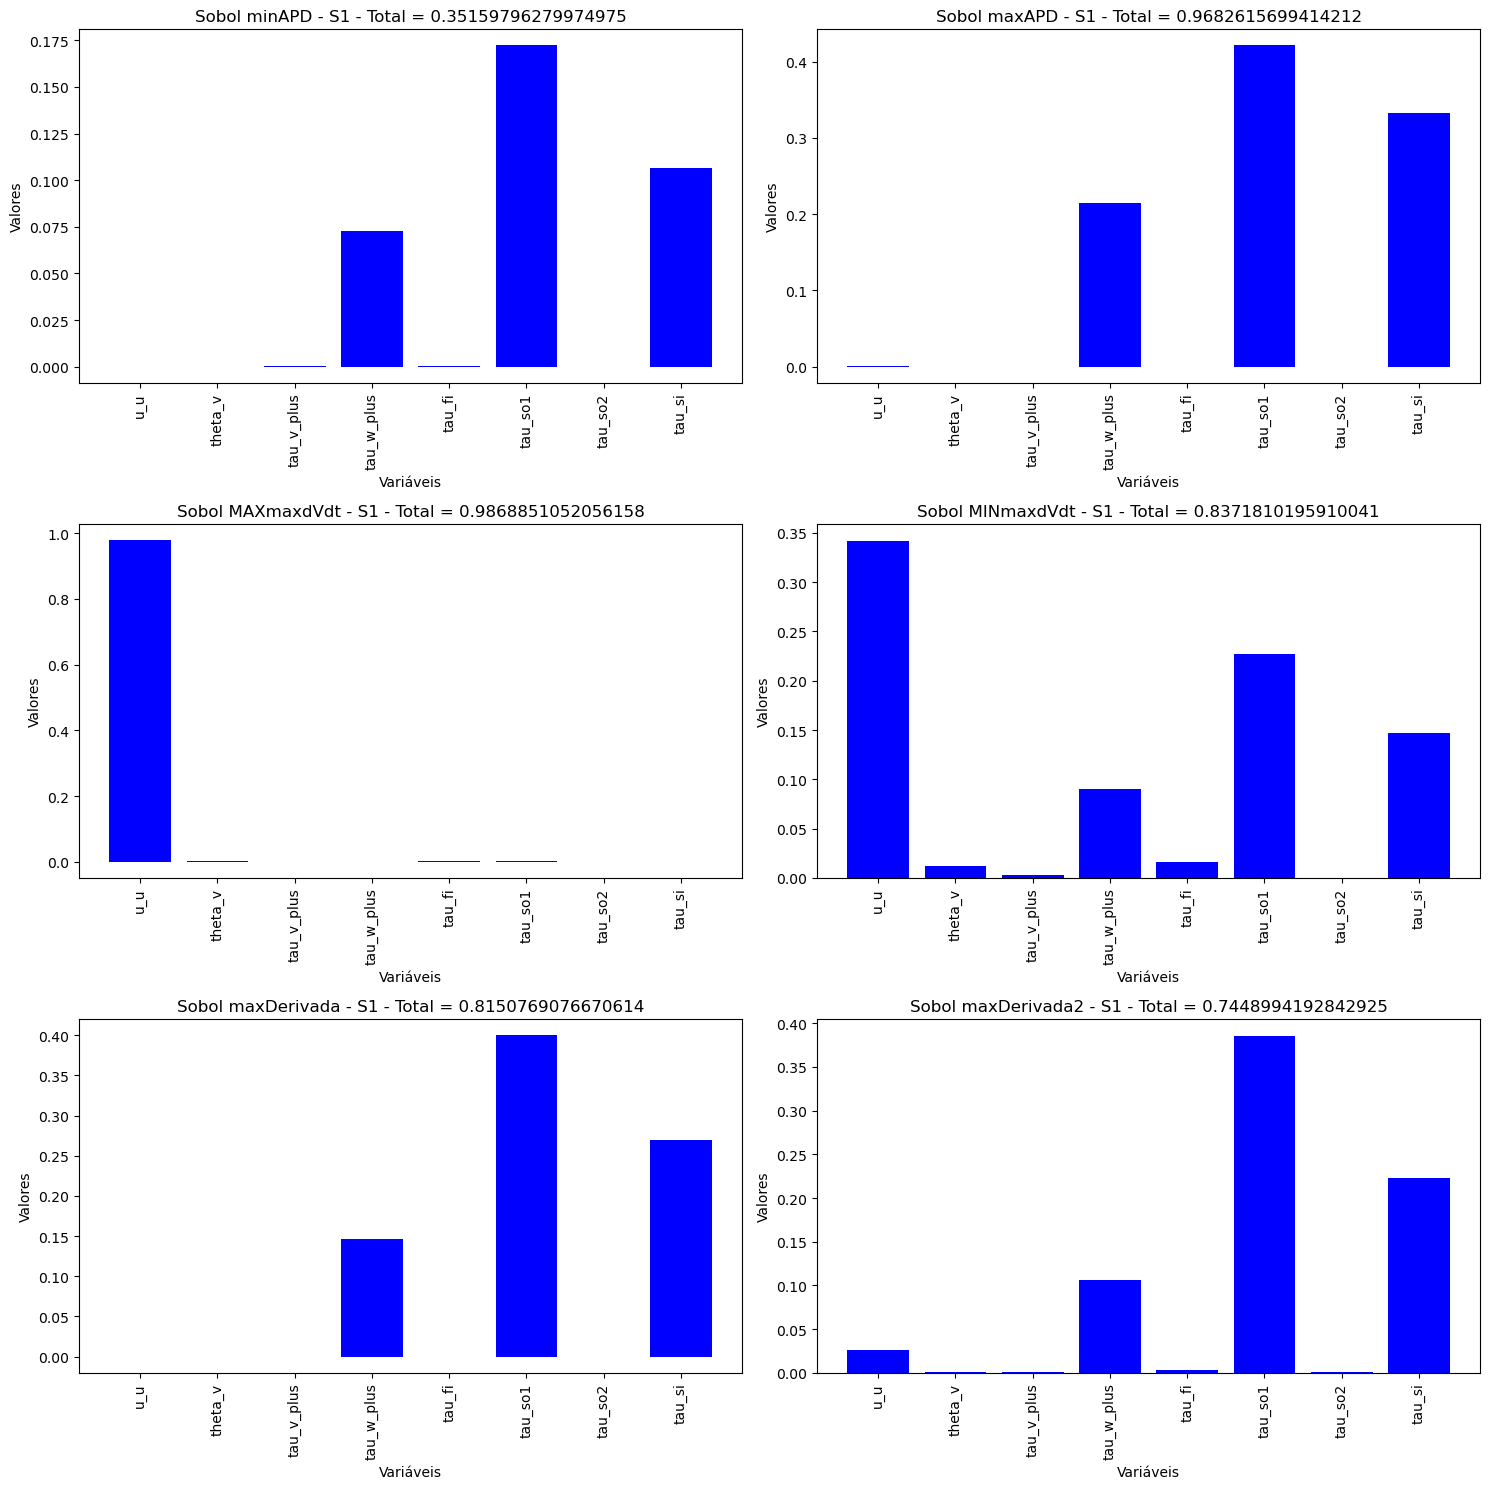

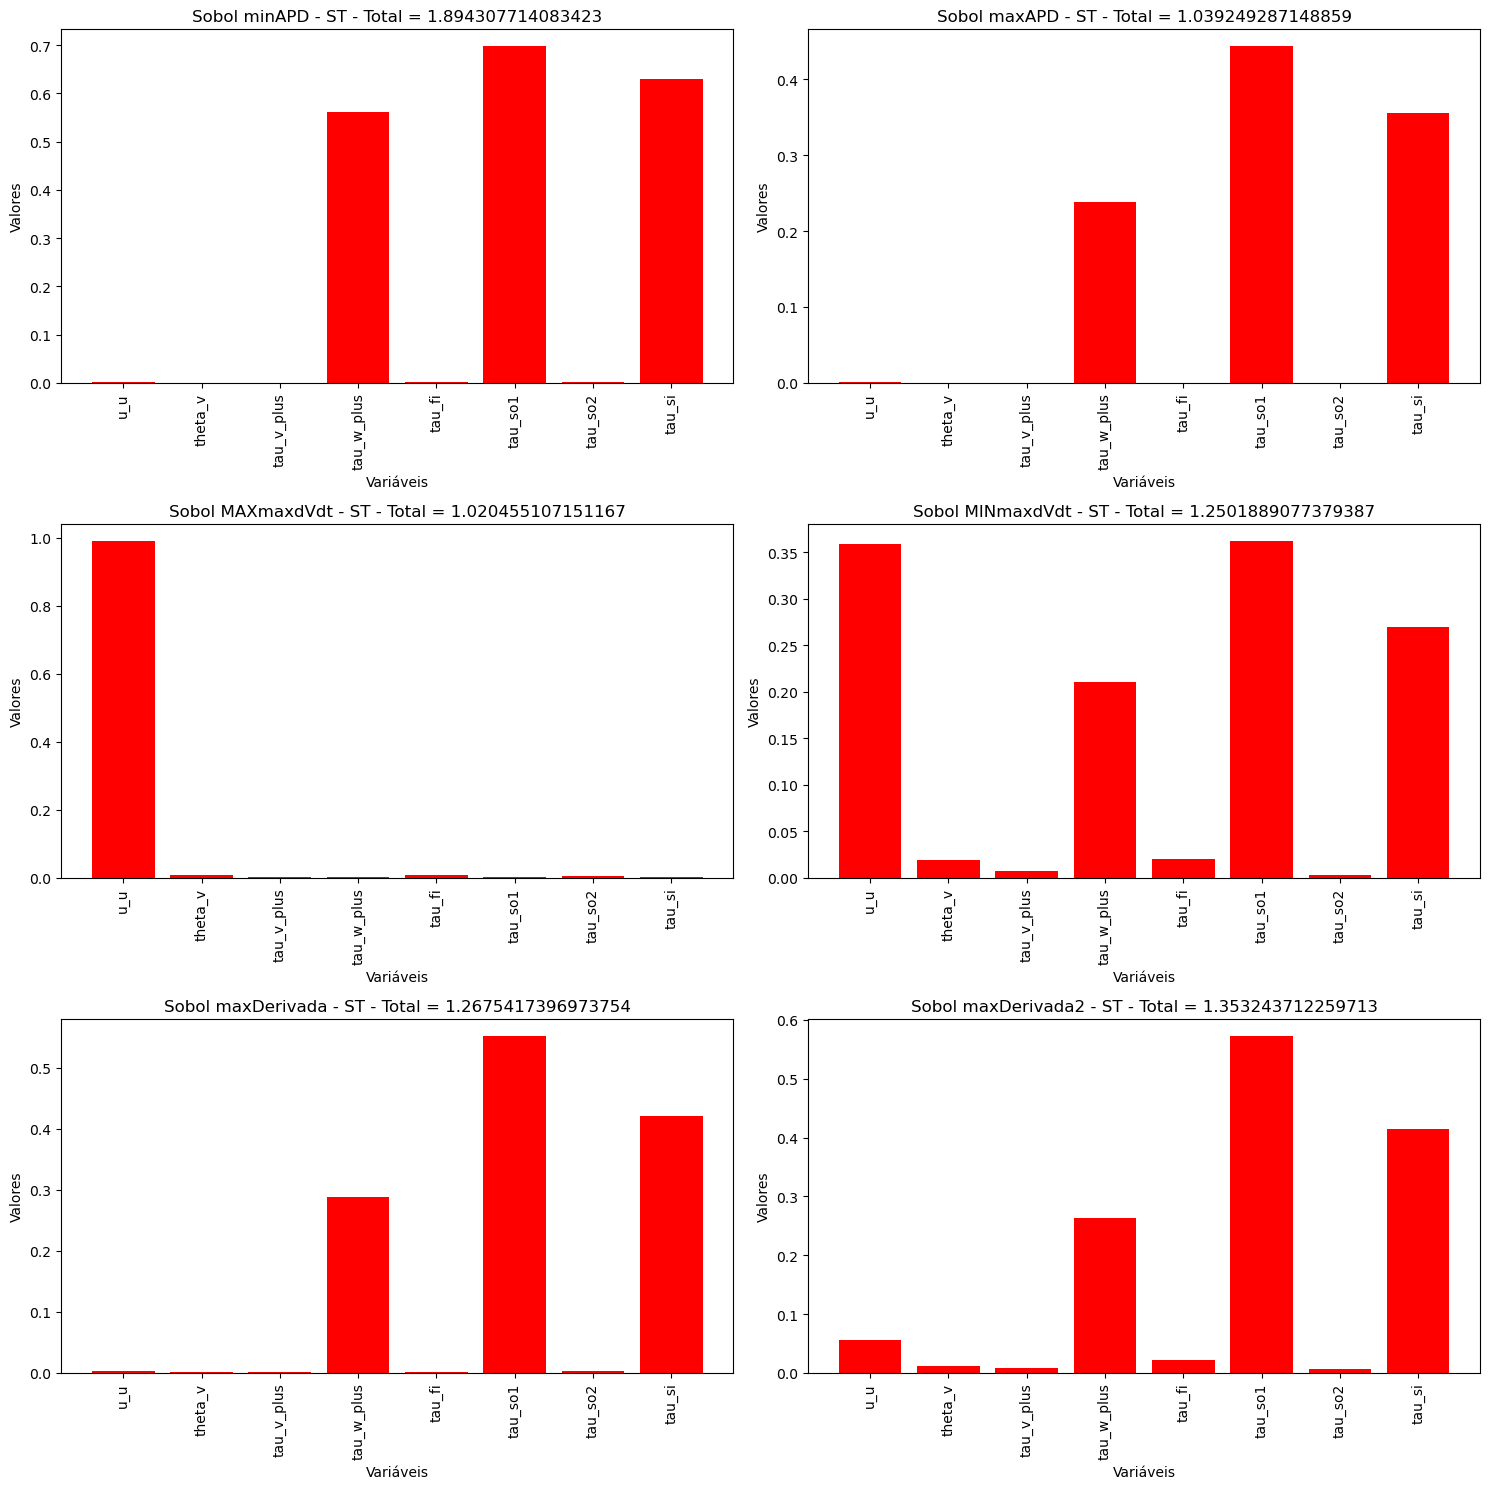

In [5]:
# Criando a figura com 6 subplots lado a lado
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # Ajuste o tamanho da figura conforme necessário
axs = axs.flatten()  # Facilita o acesso aos eixos

# Plotando cada gráfico em um subplot diferente
for i, resultado in enumerate(resultados):
    axs[i].bar(nomes_variaveis, resultado['S1'], color='blue')  # Gráfico de barras para S1
    axs[i].set_xlabel('Variáveis')
    axs[i].set_ylabel('Valores')
    axs[i].set_title(f"Sobol {variaveis[i]} - S1 - Total = {sum(resultado['S1'])}")
    axs[i].set_xticks(nomes_variaveis)
    axs[i].tick_params(axis='x', rotation=90)  # Rotaciona os rótulos do eixo x, se necessário

plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()  # Mostra o gráfico

# Criando a figura com 6 subplots lado a lado
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # Ajuste o tamanho da figura conforme necessário
axs = axs.flatten()  # Facilita o acesso aos eixos

# Plotando cada gráfico em um subplot diferente
for i, resultado in enumerate(resultados):
    axs[i].bar(nomes_variaveis, resultado['ST'], color='red')  # Gráfico de barras para S1
    axs[i].set_xlabel('Variáveis')
    axs[i].set_ylabel('Valores')
    axs[i].set_title(f"Sobol {variaveis[i]} - ST - Total = {sum(resultado['ST'])}")
    axs[i].set_xticks(nomes_variaveis)
    axs[i].tick_params(axis='x', rotation=90)  # Rotaciona os rótulos do eixo x, se necessário

plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()  # Mostra o gráfico

# S2

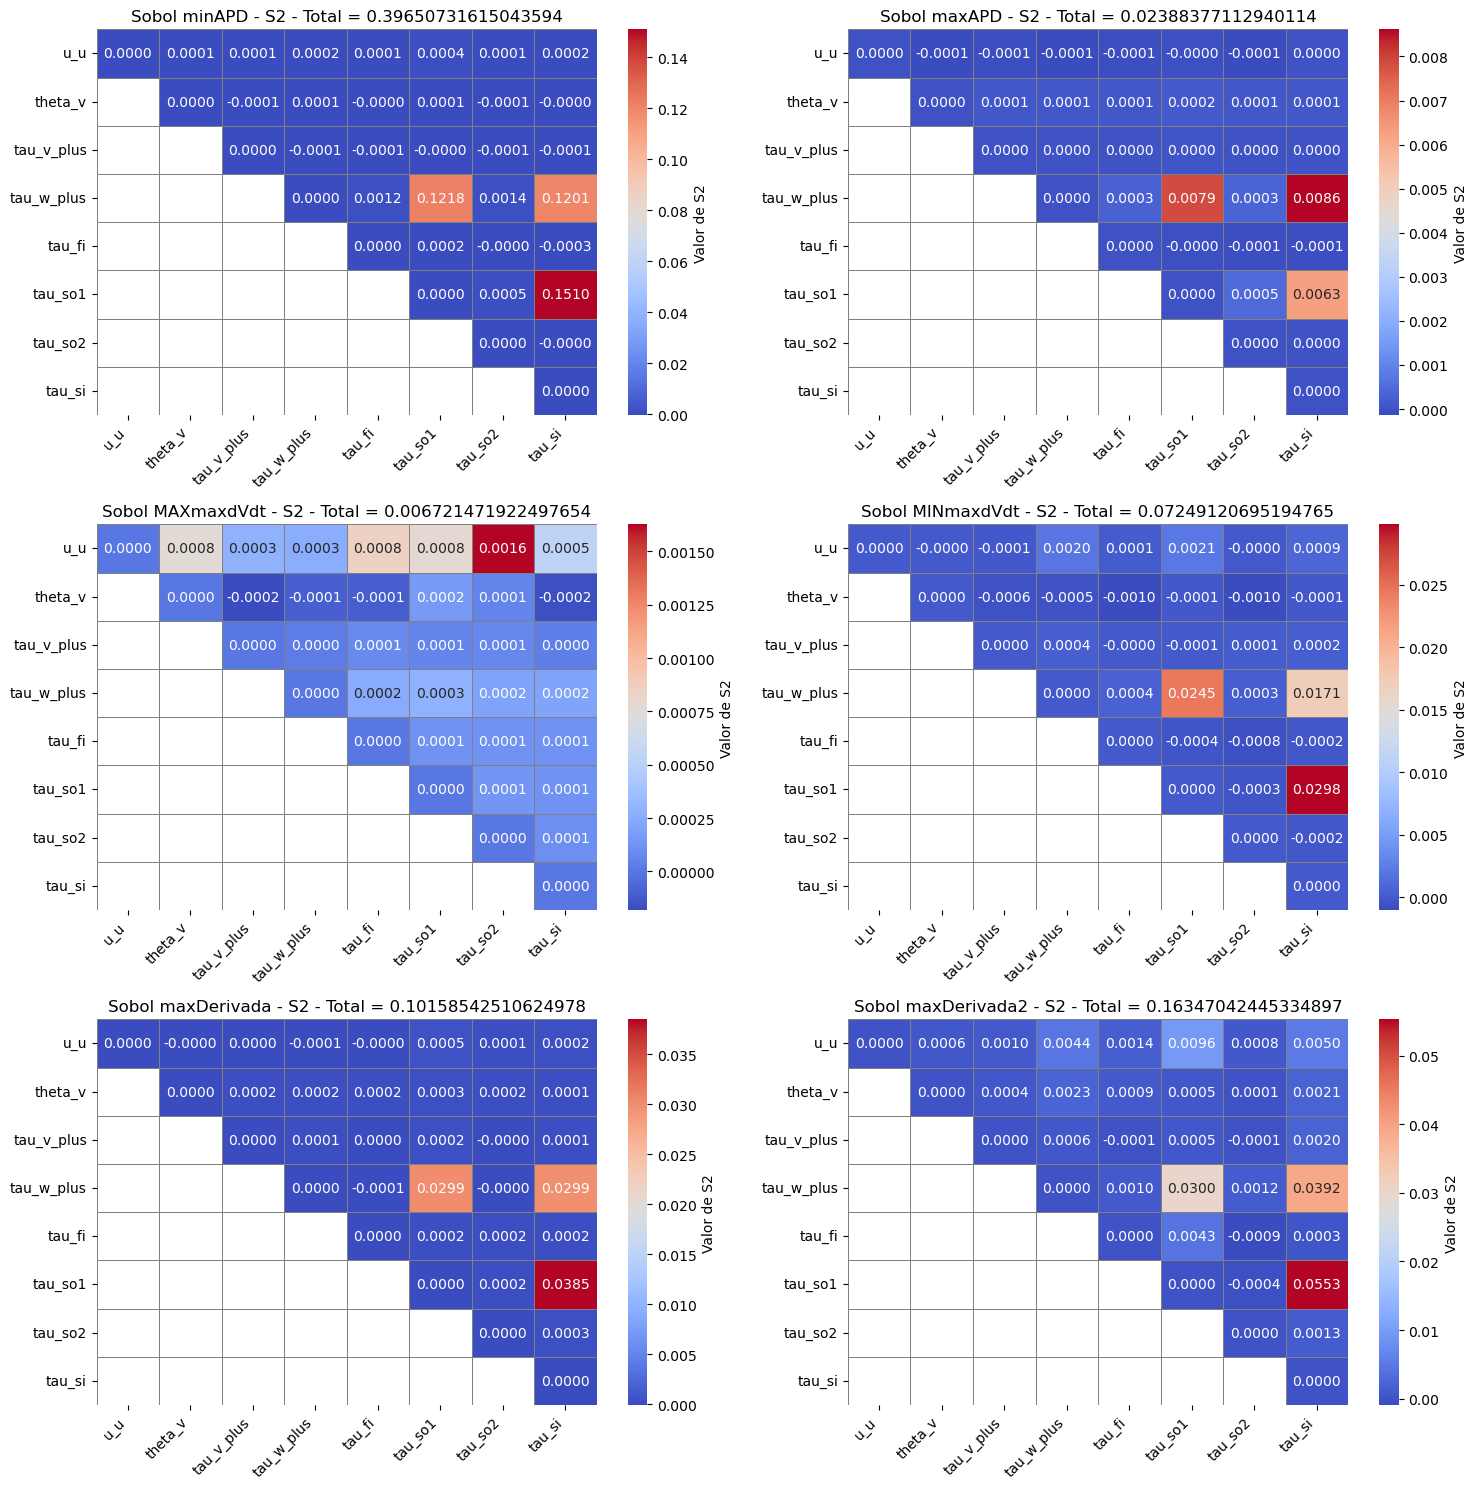

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Criando a figura com 6 subplots lado a lado
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # Ajuste o tamanho da figura conforme necessário
axs = axs.flatten()  # Facilita o acesso aos eixos

# Loop para gerar os heatmaps em cada subplot
for idx, resultado in enumerate(resultados):
    # Supondo que Si['S2'] é uma matriz de pares
    s2_matrix = np.zeros((len(nomes_variaveis), len(nomes_variaveis)))

    # Preencher a matriz simétrica com os valores de Si['S2']
    for i in range(len(nomes_variaveis)):
        for j in range(i + 1, len(nomes_variaveis)):
            s2_matrix[i, j] = resultado['S2'][i, j]  # valores de S2 entre i e j
            s2_matrix[j, i] = np.nan  # Opcionalmente use np.nan para células não preenchidas

    # Plotando o heatmap no subplot correspondente
    sns.heatmap(s2_matrix, 
                annot=True, 
                fmt=".4f",  # Formatar números com 5 casas decimais
                cmap='coolwarm',  # Paleta de cores que destaca variações
                linewidths=0.5,  # Linhas de grade para separar as células
                linecolor='gray',  # Cor da grade
                xticklabels=nomes_variaveis, 
                yticklabels=nomes_variaveis,
                cbar_kws={'label': 'Valor de S2'},  # Rótulo da barra de cores
                ax=axs[idx])  # Define o eixo do subplot

    axs[idx].set_title(f"Sobol {variaveis[idx]} - S2 - Total = {np.nansum(resultado['S2'])}")  # Título do subplot
    axs[idx].set_xticklabels(nomes_variaveis, rotation=45, ha='right')  # Rotaciona os rótulos do eixo x
    axs[idx].set_yticklabels(nomes_variaveis, rotation=0)  # Rótulos do eixo y

plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()  # Mostra o gráfico


/tmp/ipykernel_11079/1041748796.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx].set_xticklabels(parameter_pairs, rotation=90)
/tmp/ipykernel_11079/1041748796.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx].set_xticklabels(parameter_pairs, rotation=90)
/tmp/ipykernel_11079/1041748796.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx].set_xticklabels(parameter_pairs, rotation=90)
/tmp/ipykernel_11079/1041748796.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx].set_xticklabels(parameter_pairs, rotation=90)
/tmp/ipykernel_11079/1041748796.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx].set_xticklabels(parameter_pairs, rotation=90)
/tmp/ipykernel_11079/1041748796.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx].set_xticklabels(para

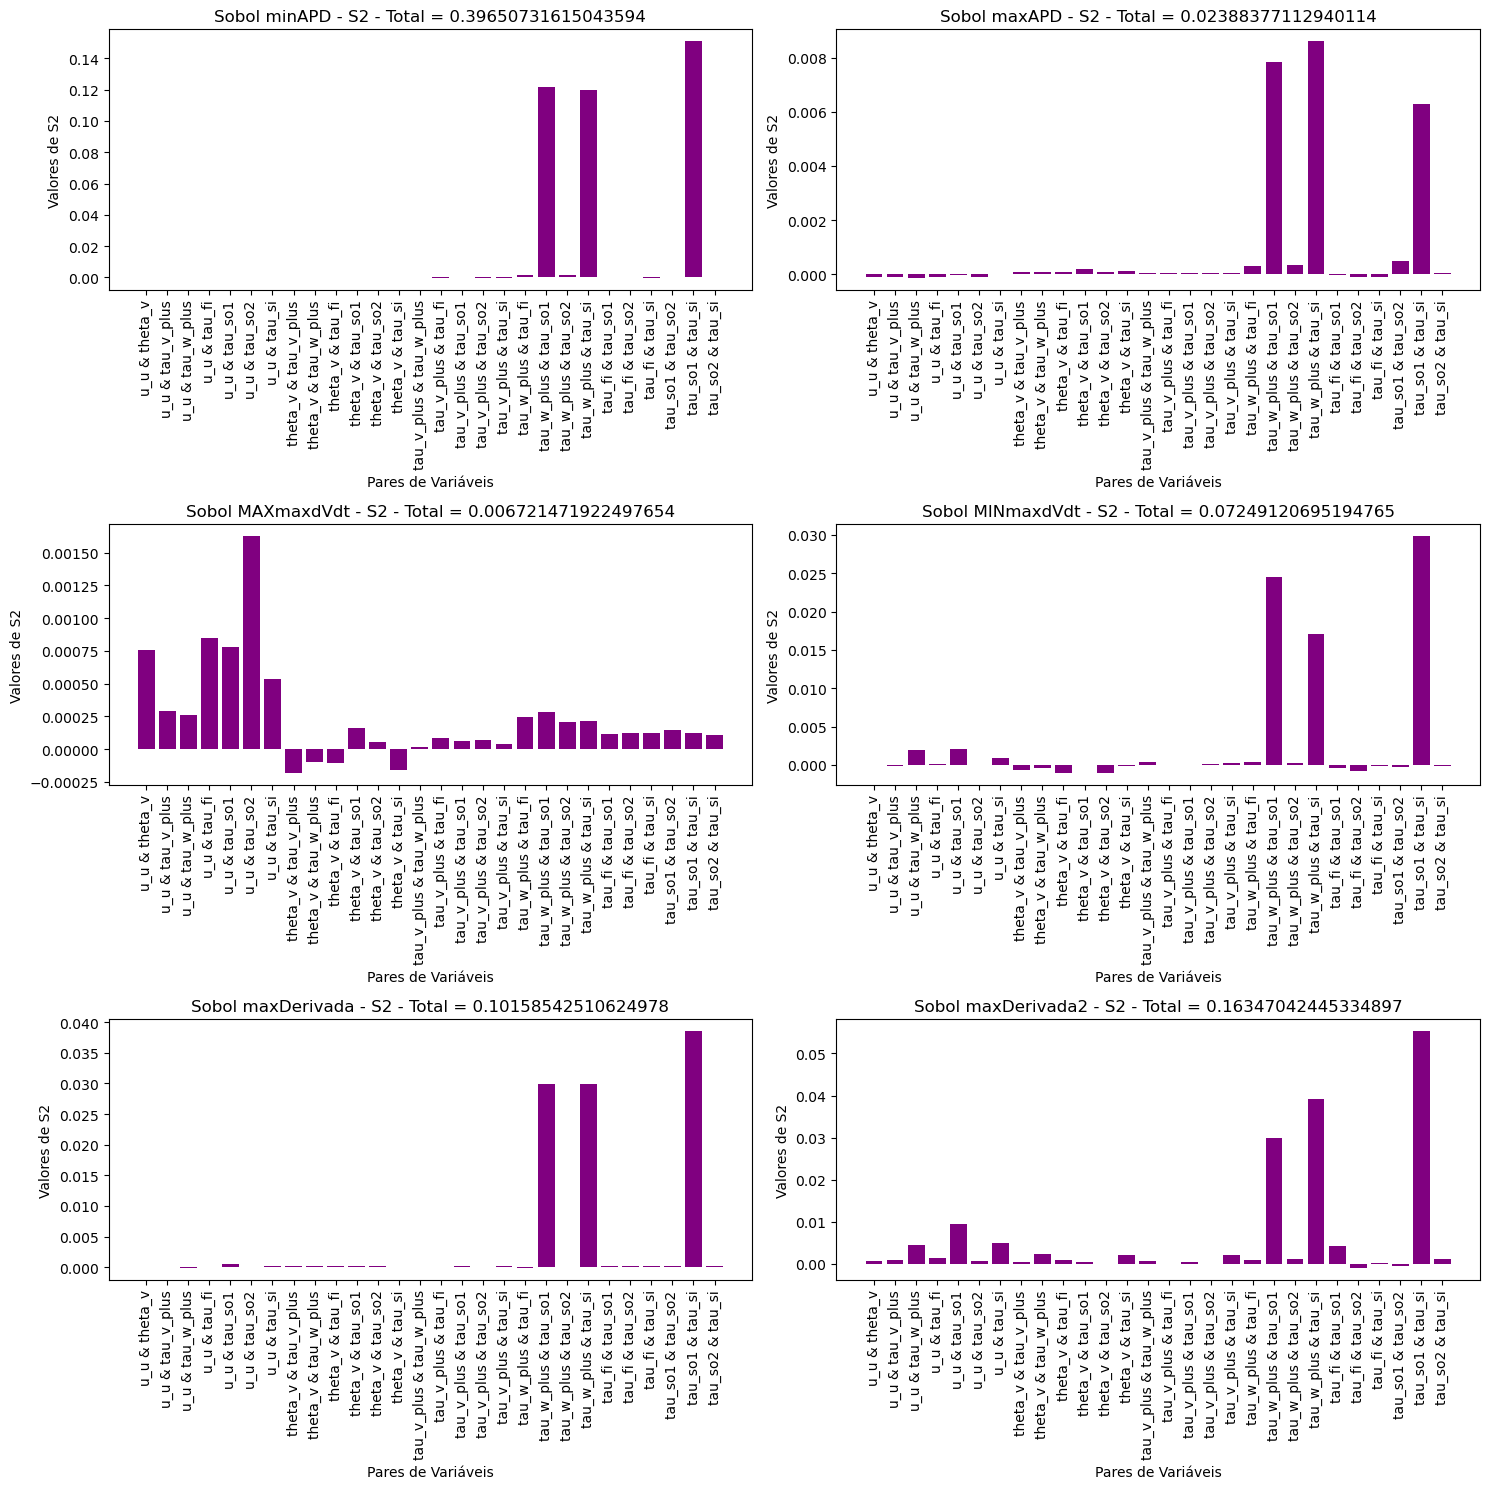

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Criando a figura com 6 subplots lado a lado
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # Ajuste o tamanho da figura conforme necessário
axs = axs.flatten()  # Facilita o acesso aos eixos
nomes_variaveis = ['u_u', 'theta_v', 'tau_v_plus', 'tau_w_plus', 'tau_fi', 'tau_so1', 'tau_so2', 'tau_si']

# Loop para gerar os gráficos de barras em cada subplot
for idx, resultado in enumerate(resultados):
    # Criar pares de parâmetros e seus valores de S2
    parameter_pairs = []
    s2_values = []

    for i in range(len(nomes_variaveis)):
        for j in range(i + 1, len(nomes_variaveis)):
            parameter_pairs.append(f'{nomes_variaveis[i]} & {nomes_variaveis[j]}')
            s2_values.append(resultado['S2'][i, j])

    # Plotar gráfico de barras
    axs[idx].bar(parameter_pairs, s2_values, color='purple')
    axs[idx].set_xlabel('Pares de Variáveis')
    axs[idx].set_ylabel('Valores de S2')
    axs[idx].set_title(f"Sobol {variaveis[idx]} - S2 - Total = {np.nansum(resultado['S2'])}")
    axs[idx].tick_params(axis='x', rotation=90)  # Rotaciona os rótulos do eixo x

    # Ajusta o layout do gráfico para garantir que os rótulos não sejam cortados
    axs[idx].set_xticklabels(parameter_pairs, rotation=90)

plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()  # Mostra o gráfico
